In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [4]:
# Define transformations (Convert images to tensors & Normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1,1]
])

# Load train and test sets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        
        # Input Layer
        self.fc1 = nn.Linear(28 * 28, 256)  # First hidden layer (more neurons)
        
        # Hidden Layers (Added more layers)
        self.fc2 = nn.Linear(256, 128)  
        self.fc3 = nn.Linear(128, 64)  
        self.fc4 = nn.Linear(64, 32)   # New hidden layer
        self.fc5 = nn.Linear(32, 10)   # Output layer (still 10 for digits 0-9)

        self.dropout = nn.Dropout(0.3)  # Add dropout to prevent overfitting
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten image
        
        # Forward pass with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))  # New layer activation
        x = self.fc5(x)          # No activation on final layer (logits)
        
        return x

# Initialize model, loss function, and optimizer
model = MNIST_Net()
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

print("Training Complete!")

correct = 0
total = 0

# No gradient tracking needed during evaluation
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch 1, Loss: 0.9020
Epoch 2, Loss: 0.6542
Epoch 3, Loss: 0.6063
Epoch 4, Loss: 0.5866
Epoch 5, Loss: 0.5693
Training Complete!
Test Accuracy: 97.16%


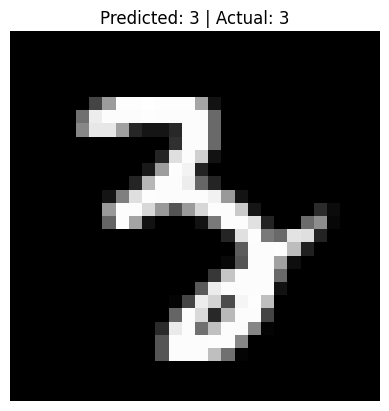

In [38]:
# Get a single batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Select a random image from the batch
index = np.random.randint(0, len(images))  # Random index
image = images[index]  # Select the image
true_label = labels[index].item()  # True label

# Set model to evaluation mode and make a prediction
model.eval()
with torch.no_grad():
    output = model(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)  # Get highest probability index

predicted_label = predicted_label.item()  # Convert tensor to int

# Plot the image with the predicted label
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_label} | Actual: {true_label}")
plt.axis("off")
plt.show()